# Change of basis matrices

## A1

#### Code to compute the change of basis matrix $A_1$

We begin by importing some stuff and defining our functions:

In [1]:
import numpy as np
from IPython.display import display, Math
import sympy
from sympy import *
from sympy.functions.special.tensor_functions import KroneckerDelta

# Initialize the session
init_session(quiet=True)

# I am using the dev version of sympy
print("Using sympy version", sympy.__version__)

# Define our symbols
x, y, z, mu, nu, l, m, j, k, p, q, n = symbols('x y z mu nu l m j k p q n')


Using sympy version 1.1.2.dev


In [2]:
# Definitions from `bp.ipynb`
def ptilde(n, x, y):
    """Return the n^th term in the polynomial basis."""
    l = floor(sqrt(n))
    m = n - l * l - l
    mu = l - m
    nu = l + m
    if (nu % 2 == 0):
        i = mu // 2
        j = nu // 2
        k = 0
    else:
        i = (mu - 1) // 2
        j = (nu - 1) // 2
        k = 1
    return x ** i * y ** j * sqrt(1 - x ** 2 - y ** 2) ** k

In [3]:
# Definitions from `ylmxyz.ipynb`
def A(l, m):
    """A spherical harmonic normalization constant."""
    return sqrt((2 - KroneckerDelta(m, 0)) * (2 * l + 1) * factorial(l - m) / (4 * pi * factorial(l + m)))

def B(l, m, j, k):
    """Another spherical harmonic normalization constant."""
    try: 
        ratio = factorial((l + m + k - 1) / 2) / factorial((-l + m + k - 1) / 2)
    except ValueError:
        ratio = 0
    return 2 ** l * factorial(m) / (factorial(j) * factorial(k) * factorial(m - j) * factorial(l - m - k)) * ratio

def C(p, q, k):
    """Return the binomial theorem coefficient `C`."""
    return factorial(k / 2) / (factorial(q / 2) * factorial((k - p) / 2) * factorial((p - q) / 2))

def Y(l, m, x, y):
    """Return the spherical harmonic of degree `l` and order `m`."""
    res = 0
    z = sqrt(1 - x ** 2 - y ** 2)
    if (m >= 0):
        for j in range(0, m + 1, 2):
            for k in range(0, l - m + 1, 2):
                for p in range(0, k + 1, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p) // 2) * A(l, m) * B(l, m, j, k) * C(p, q, k) * x ** (m - j + p - q) * y ** (j + q)
            for k in range(1, l - m + 1, 2):
                for p in range(0, k, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p) // 2) * A(l, m) * B(l, m, j, k) * C(p, q, k - 1) * x ** (m - j + p - q) * y ** (j + q) * z          
    else:
        for j in range(1, abs(m) + 1, 2):
            for k in range(0, l - abs(m) + 1, 2):
                for p in range(0, k + 1, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p - 1) // 2) * A(l, abs(m)) * B(l, abs(m), j, k) * C(p, q, k) * x ** (abs(m) - j + p - q) * y ** (j + q)
            for k in range(1, l - abs(m) + 1, 2):
                for p in range(0, k, 2):
                    for q in range(0, p + 1, 2):
                        res += (-1) ** ((j + p - 1) // 2) * A(l, abs(m)) * B(l, abs(m), j, k) * C(p, q, k - 1) * x ** (abs(m) - j + p - q) * y ** (j + q) * z

    return res

In [4]:
def Coefficient(expression, term):
    """Return the coefficient multiplying `term` in `expression`."""
    # Get the coefficient
    coeff = expression.coeff(term)
    # Set any non-constants in this coefficient to zero. If the coefficient
    # is not a constant, this is not the term we are interested in!
    coeff = coeff.subs(sqrt(1 - x ** 2 - y ** 2), 0).subs(x, 0).subs(y, 0)
    return coeff

In [5]:
def p_Y(l, m, lmax):
    """Return the polynomial basis representation of the spherical harmonic `Y_{lm}`."""
    ylm = Y(l, m, x, y)
    res = [ylm.subs(sqrt(1 - x ** 2 - y ** 2), 0).subs(x, 0).subs(y, 0)]
    for n in range(1, (lmax + 1) ** 2):
        res.append(Coefficient(ylm, ptilde(n, x, y)))
    return res

In [6]:
def A1(lmax):
    """Return the change of basis matrix A1. The columns of this matrix are given by `p_Y`."""
    res = zeros((lmax + 1) ** 2, (lmax + 1) ** 2)
    n = 0
    for l in range(lmax + 1):
        for m in range(-l, l + 1):
            res[n] = p_Y(l, m, lmax)
            n += 1
    return res

We can finally evaluate the change of basis matrix for $l_\mathrm{max} = 2$:

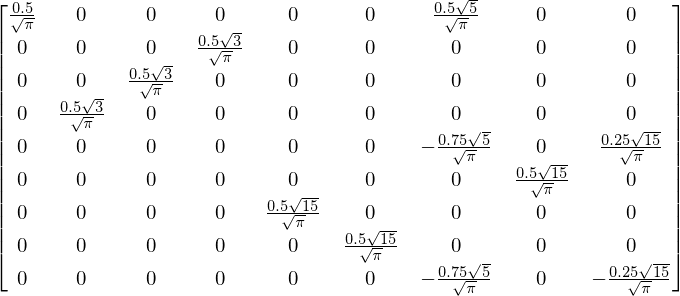

In [7]:
A1(2)

■

## A2

#### Code to compute the change of basis matrix $A_2$

In [8]:
# Definitions from `bp.ipynb`
def gtilde(n, x, y):
    """Return the n^th term in the Green's basis."""
    l = floor(sqrt(n))
    m = n - l * l - l
    mu = l - m
    nu = l + m
    if (nu % 2 == 0):
        I = [mu // 2]
        J = [nu // 2]
        K = [0]
        C = [(mu + 2) // 2]
    elif (l == 1) and (m == 0):
        I = [0]
        J = [0]
        K = [1]
        C = [1]
    elif (mu == 1) and (l % 2 == 0):
        I = [l - 2]
        J = [1]
        K = [1]
        C = [3]
    elif (mu == 1):
        I = [l - 3, l - 1, l - 3]
        J = [0, 0, 2]
        K = [1, 1, 1]
        C = [-1, 1, 4]
    else:
        I = [(mu - 5) // 2, (mu - 5) // 2, (mu - 1) // 2]
        J = [(nu - 1) // 2, (nu + 3) // 2, (nu - 1) // 2]
        K = [1, 1, 1]
        C = [(mu - 3) // 2, -(mu - 3) // 2, -(mu + 3) // 2]
    
    res = 0
    for i, j, k, c in zip(I, J, K, C):
        res += c * x ** i * y ** j * sqrt(1 - x ** 2 - y ** 2) ** k
    return res

In [9]:
def p_G(n, lmax):
    """Return the polynomial basis representation of the Green's polynomial `g`."""
    g = gtilde(n, x, y)
    res = [g.subs(sqrt(1 - x ** 2 - y ** 2), 0).subs(x, 0).subs(y, 0)]
    for n in range(1, (lmax + 1) ** 2):
        res.append(Coefficient(g, ptilde(n, x, y)))
    return res

In [10]:
def A2(lmax):
    """Return the change of basis matrix A2. The columns of the **inverse** of this matrix are given by `p_G`."""
    res = zeros((lmax + 1) ** 2, (lmax + 1) ** 2)
    n = 0
    for l in range(lmax + 1):
        for m in range(-l, l + 1):
            res[n] = p_G(n, lmax)
            n += 1
    return res.inv()

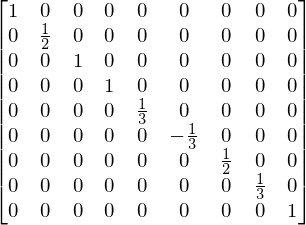

In [11]:
A2(2)

■

## A

#### Code to compute the full change of basis matrix $A$

This is now easy: it's just the dot product of the previous two matrices.

In [12]:
def AFull(lmax):
    """Return the full change of basis matrix."""
    return A2(lmax) * A1(lmax)

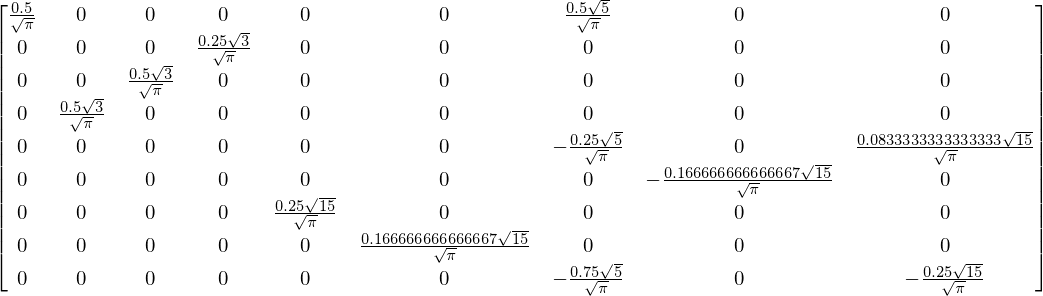

In [13]:
AFull(2)

■